# Write MarkDown between cells.

in order to do so.

press `esc` on keyboard, and then press `m`


In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split # this is used to split data into train, and test 
from sklearn.linear_model import LinearRegression # import linear models


# Now, load the data with pd.read_csv()

In [4]:
df = pd.read_csv("../data/linear.csv")
df.head()

,x,y
0,0.000000,-51.000000
1,25.000000,-12.000000
2,117.583220,134.907414
3,108.922466,134.085180
4,69.887445,NaN


In [6]:
# check shape of the dataframe
print(df.shape)


(102, 2)


In [7]:
# check number of missing values
df.isnull().sum() # we have 8 missing values

x    0
y    8
dtype: int64

In [10]:
df = df.dropna(how="any")

In [11]:
df.shape # now we have remove 8 missing value rows.

(94, 2)

# extract the feature matrix

In [19]:
X = df.loc[:,["x"]].values # select all rows, and x column
X[:6]

array([[  0.        ],
       [ 25.        ],
       [117.5832198 ],
       [108.9224662 ],
       [ 96.83998269],
       [ 51.77594025]])

In [22]:
X.shape

(94, 1)

In [26]:
X.ndim

2

# extract target vector Note df.loc[[]] will return a dataframe.

In [21]:
y = df.loc[:,"y"].values
y[:6]

array([-51.        , -12.        , 134.9074137 , 134.0851795 ,
       114.5306376 ,  31.37643731])

In [23]:
y.shape

(94,)

In [27]:
y.ndim

1

# create an instance for a imported model

In [28]:
reg = LinearRegression(fit_intercept=True) # here one argument, true or false

# use fit.() to train your model

In [29]:
reg.fit(X,y)

LinearRegression()

In [47]:
X= X.reshape(-1,1)

# np.reshape(-1, 3) or reshape(5,-1), here -1 means unknow rows, unknown columns, let numpy decide suitable rows or columns.

In [46]:
a = np.linspace(1,100,100)
a.size
a.shape
a.ndim
a = a.reshape(20,-1)
a.shape

(20, 5)

# use the model to predict with reg.predict()

In [48]:
reg.predict(X[0:10])

array([-50.99119328, -11.39905237, 135.223663  , 121.50775193,
       102.37289634,  31.0056196 ,   4.46431068,  74.84474012,
        20.82088826,  72.16749711])

# score to measure model performance. here in LR, score is R squared.

In [49]:
score = reg.score(X,y)
print(score)

0.979881836115762


# check your equation for linear model

In [59]:
c = reg.coef_ #coefficient

In [60]:
i = reg.intercept_ # interception

In [62]:
print(f"the equation is y = {c[0]}*x+{i}")
print("the equation is y = {:.2f}*x + {:.2f}".format(c[0],i))

the equation is y = 1.5836856364627472*x+-50.99119328333397
the equation is y = 1.58*x + -50.99


# scatter plot for reality, and line for model  prediction.

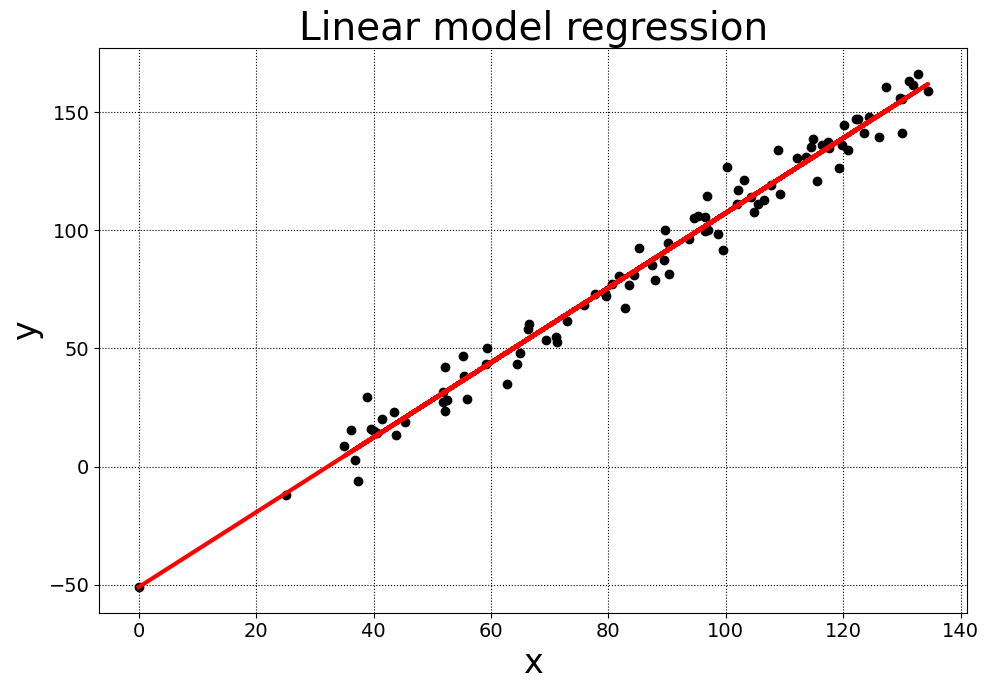

In [71]:
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(10,7))

ax.scatter(X,y, color="black")
ax.plot(X, reg.predict(X),color="red", linewidth=3)

ax.grid(True,
       axis="both",
        zorder=0,
        linestyle=":",
       color="k")


ax.tick_params(labelsize=14)
ax.set_xlabel("x", fontsize=24)
ax.set_ylabel("y", fontsize=24)
ax.set_title("Linear model regression", fontsize=28)
fig.tight_layout()